In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import os
sns.set_theme()
%matplotlib inline

In [2]:
# List all files in the folder
folder_path = 'log/'
file_names = os.listdir(folder_path)

# Optional: filter out directories if you only want files
file_names = [f for f in file_names if os.path.isfile(os.path.join(folder_path, f))]

kkk = 0 

reward1_list = []
reward2_list = []
for k in file_names:
    if k[0:19]== "scRMSD_original_AAA":
        if "reward_SVDD_scRMSD_" + k[20:-4] +'.npz' in file_names:
            kkk +=1    
        reward1 = np.load("log/" + k)['reward']
        reward2 = np.load("log/" + "reward_SVDD_scRMSD_" + k[20:-4] +'.npz' )['reward']
        reward1_list.append(np.min(reward1))
        reward2_list.append(np.median(reward2)) 
        if np.min(reward1) > 1.5:
            print(k[20:-4], np.argmin(reward1), reward1)
print(kkk)

XX|run1_0461_0006 8 [2.06077291 2.00049202 4.15390732 1.89045757 2.09527561 2.26247433
 5.50427995 4.5647036  1.81764902 2.21129205 2.09996246 2.14713521
 4.37161426 2.8997355  3.68940036 1.95790968 2.49463737 3.48546395
 1.90661222 4.34827695]
50


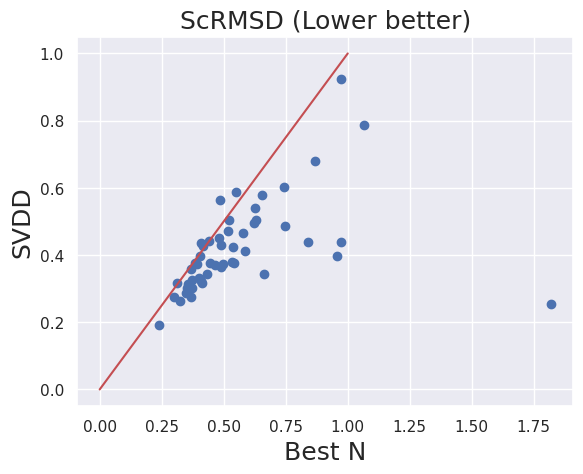

In [3]:
plt.scatter(reward1_list, reward2_list)
plt.plot(np.linspace(0,1.0,100), np.linspace(0,1.0,100),c="r")
plt.xlabel("Best N", fontsize = 18 )
plt.ylabel("SVDD", fontsize = 18)
plt.title("ScRMSD (Lower better)",fontsize = 18)
plt.savefig("ScRMSD.png")
plt.show()

In [4]:
kkk = 0 


reward1_list = []
reward2_list = []
for k in file_names:
    if k[0:19]== "scRMSD_original_AAA":
        if "reward_SVDD_stability_rosetta_" + k[20:-4] +'.npz' in file_names:
            kkk +=1    
            reward1 = np.load("log/" + "reward_original_stability_rosetta_" + k[20:-4] +'.npz')['reward']
            reward2 = np.load("log/" + "reward_SVDD_stability_rosetta_" + k[20:-4] +'.npz' )['reward']
            reward1_list.append(np.min(reward1))
            reward2_list.append(np.median(reward2))
print(kkk)

50


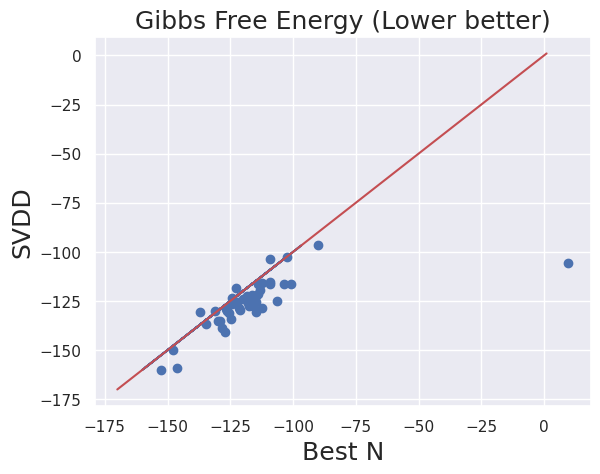

In [5]:
import seaborn as sns
plt.plot(reward2_list,reward2_list)
plt.plot(np.linspace(-170,1.0,100), np.linspace(-170,1.0,100),c="r")
plt.xlabel("Best N", fontsize = 18 )
plt.ylabel("SVDD", fontsize = 18)
plt.title("Gibbs Free Energy (Lower better)",fontsize = 18)
plt.savefig("Energy.png")
plt.scatter(reward1_list, reward2_list)
plt.show()